In [5]:
import arkouda as ak
import arachne as ar
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import numpy as np
from fafbseg import flywire
import navis
from compcon.navis_api import get_flywire_neuron, get_hemibrain_neuron
from compcon.create_graph import get_neuron, get_graph, get_branch_node_graph, draw_graph, get_neuron_local
from compcon.isomporphic_subgraphs import find_isomorphic_subgraphs


In [14]:
n= get_neuron(id=720575940627895056, prune_factor=1, ds_factor=1000)

read from cache 720575940627895056


In [15]:
n.connectors

,connector_id,x,y,z,cleft_score,partner_id,type,node_id
0,0,491.400048,141.867446,141.935590,144,720575940507344965,pre,393
1,1,493.127444,135.556259,143.930408,141,720575940591815852,pre,443
2,2,493.164336,135.559237,143.928415,143,720575940592559020,pre,443
3,3,493.347011,135.214038,144.038164,124,720575940592559020,pre,454
4,4,492.858618,134.853527,143.903230,141,720575940591794860,pre,443
...,...,...,...,...,...,...,...,...
425,508,403.845901,164.652927,131.803922,142,720575940611302883,post,35
426,509,512.674918,156.808348,159.139412,148,720575940627977415,post,716
427,510,515.123069,147.878960,158.617261,145,720575940615013939,post,787
428,511,493.247198,131.573436,143.707586,77,720575940644127432,post,456


In [3]:
graph= get_graph(n.edges)
branch_node_graph= get_branch_node_graph(n.edges)

connected to arkouda server tcp://*:5555
connected to arkouda server tcp://*:5555
disconnected from arkouda server tcp://*:5555


In [4]:
print(f"Normal graph has {len(graph)} vertices and {graph.size()} edges. \nBranch_node_graph has {len(branch_node_graph)} vertices and {branch_node_graph.size()} edges")

Normal graph has 85 vertices and 84 edges. 
Branch_node_graph has 83 vertices and 82 edges


connected to arkouda server tcp://*:5555


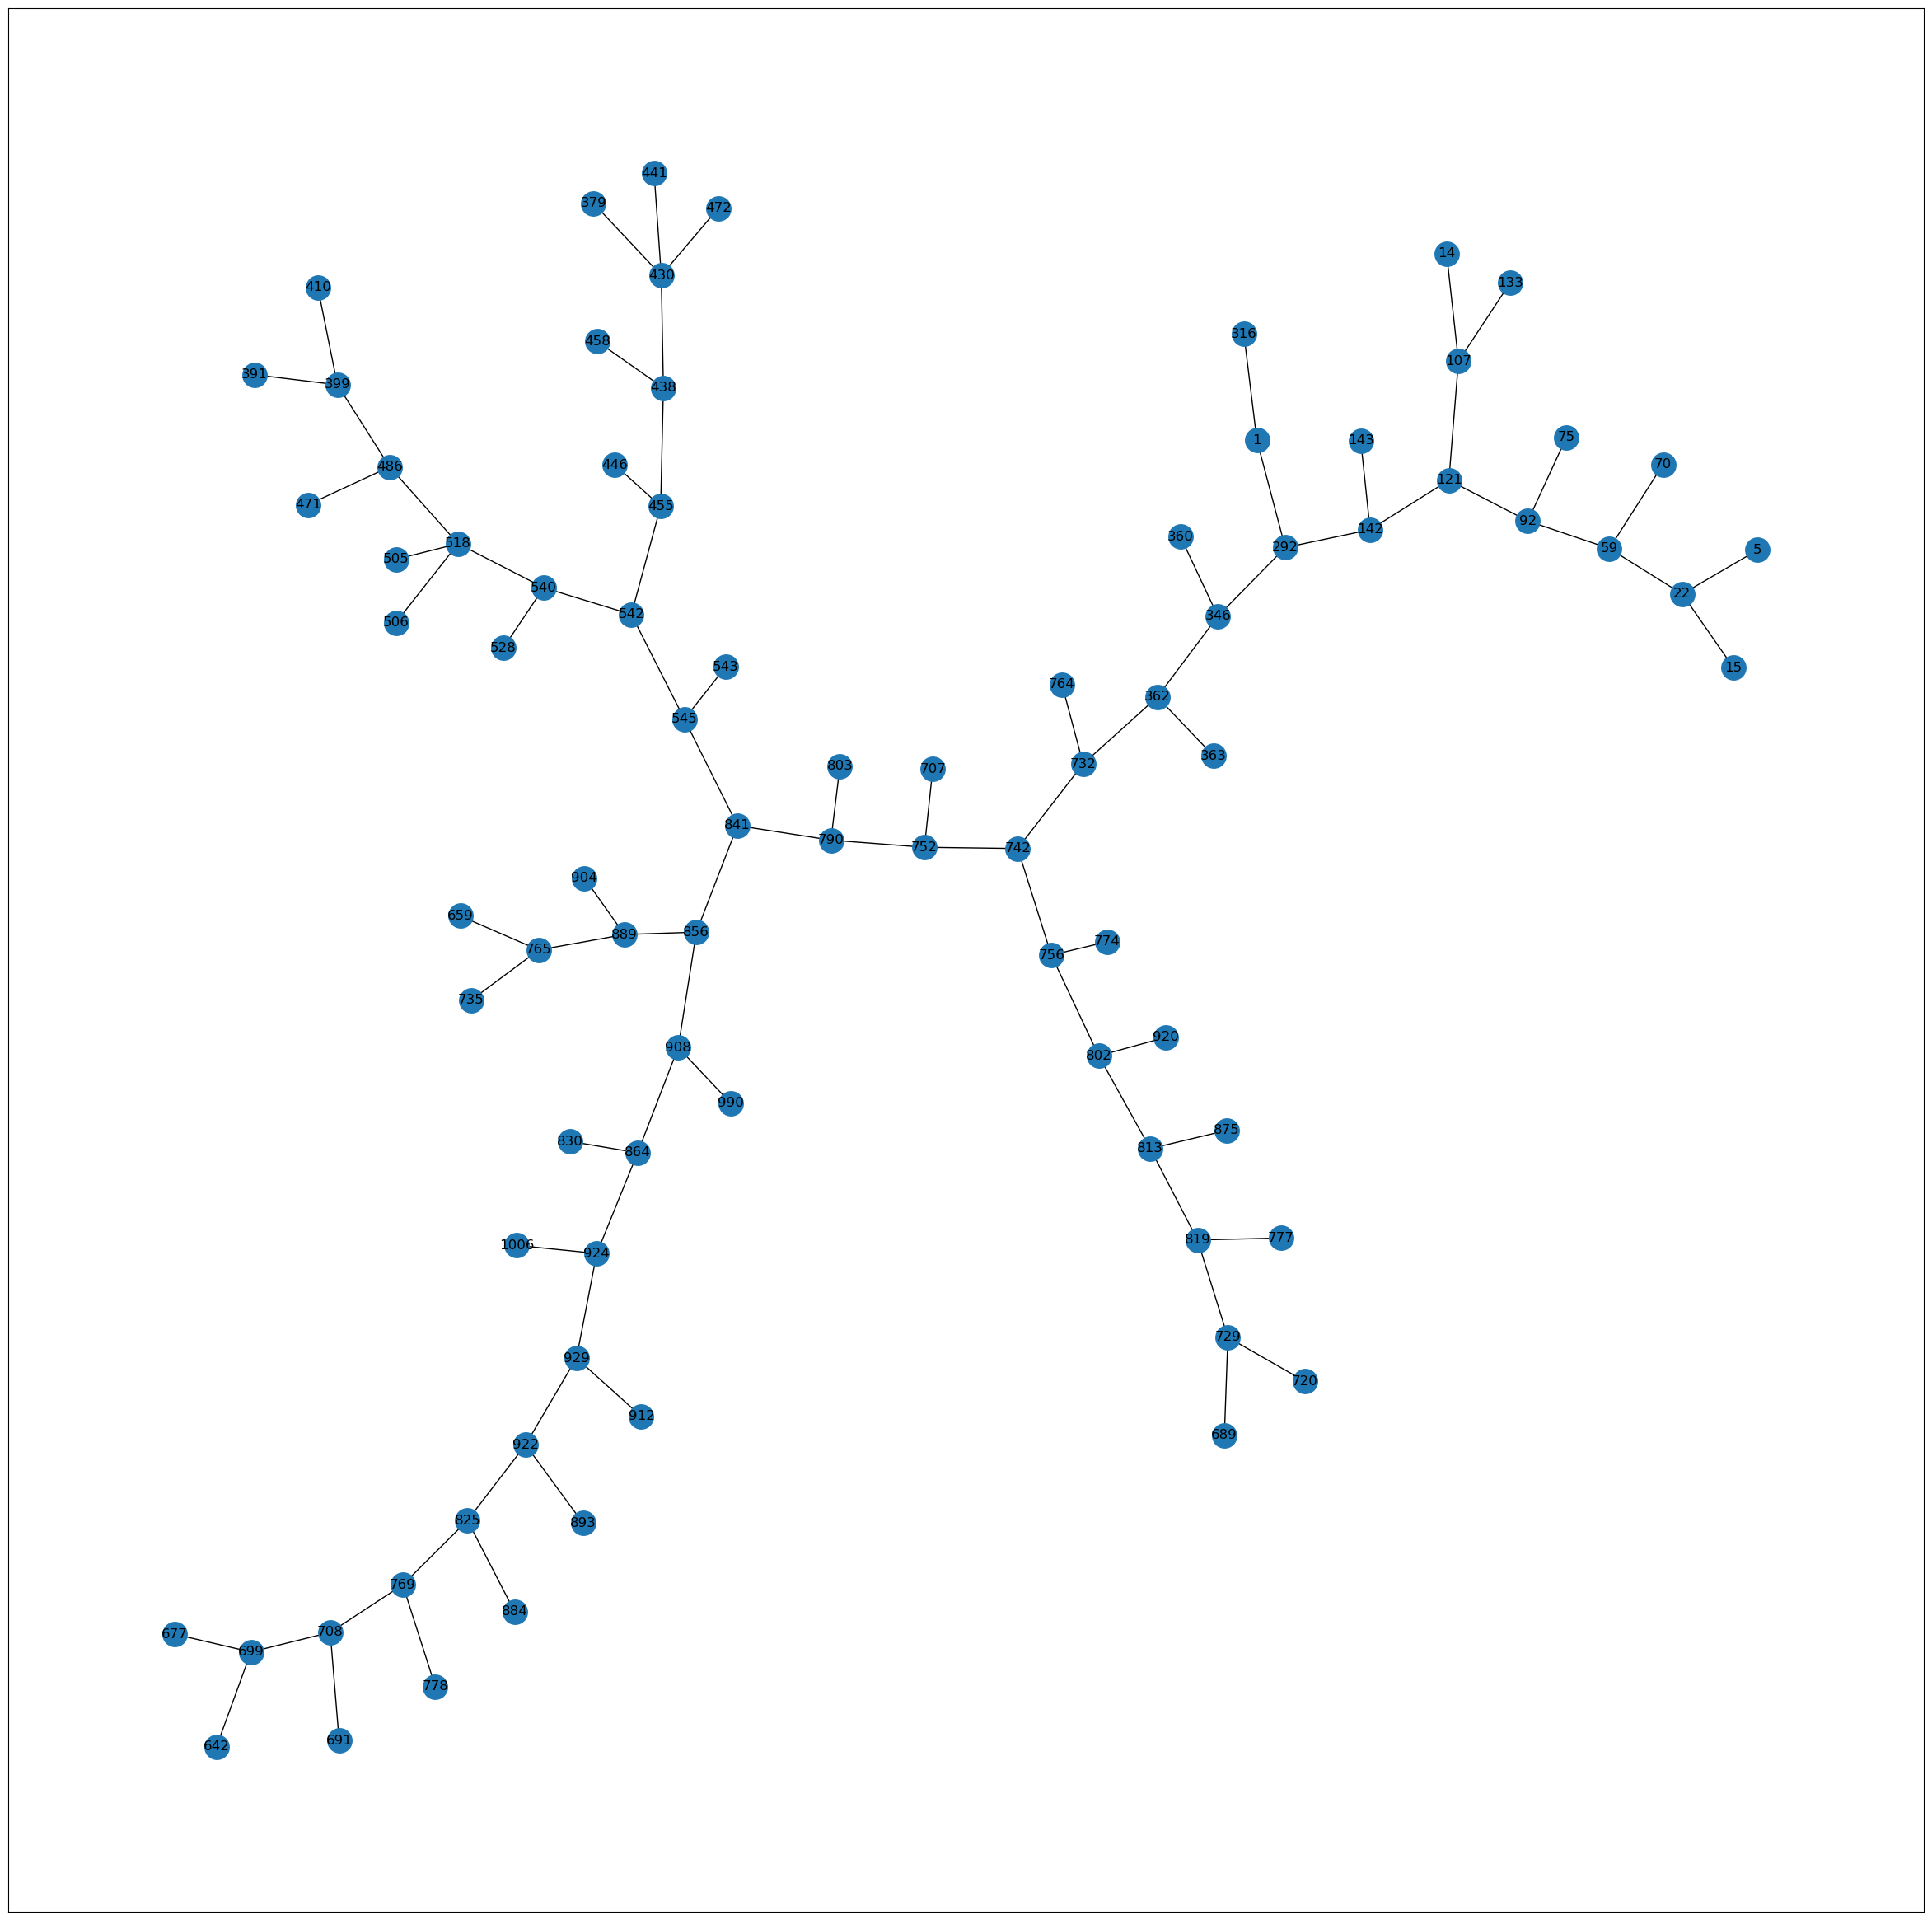

disconnected from arkouda server tcp://*:5555
connected to arkouda server tcp://*:5555


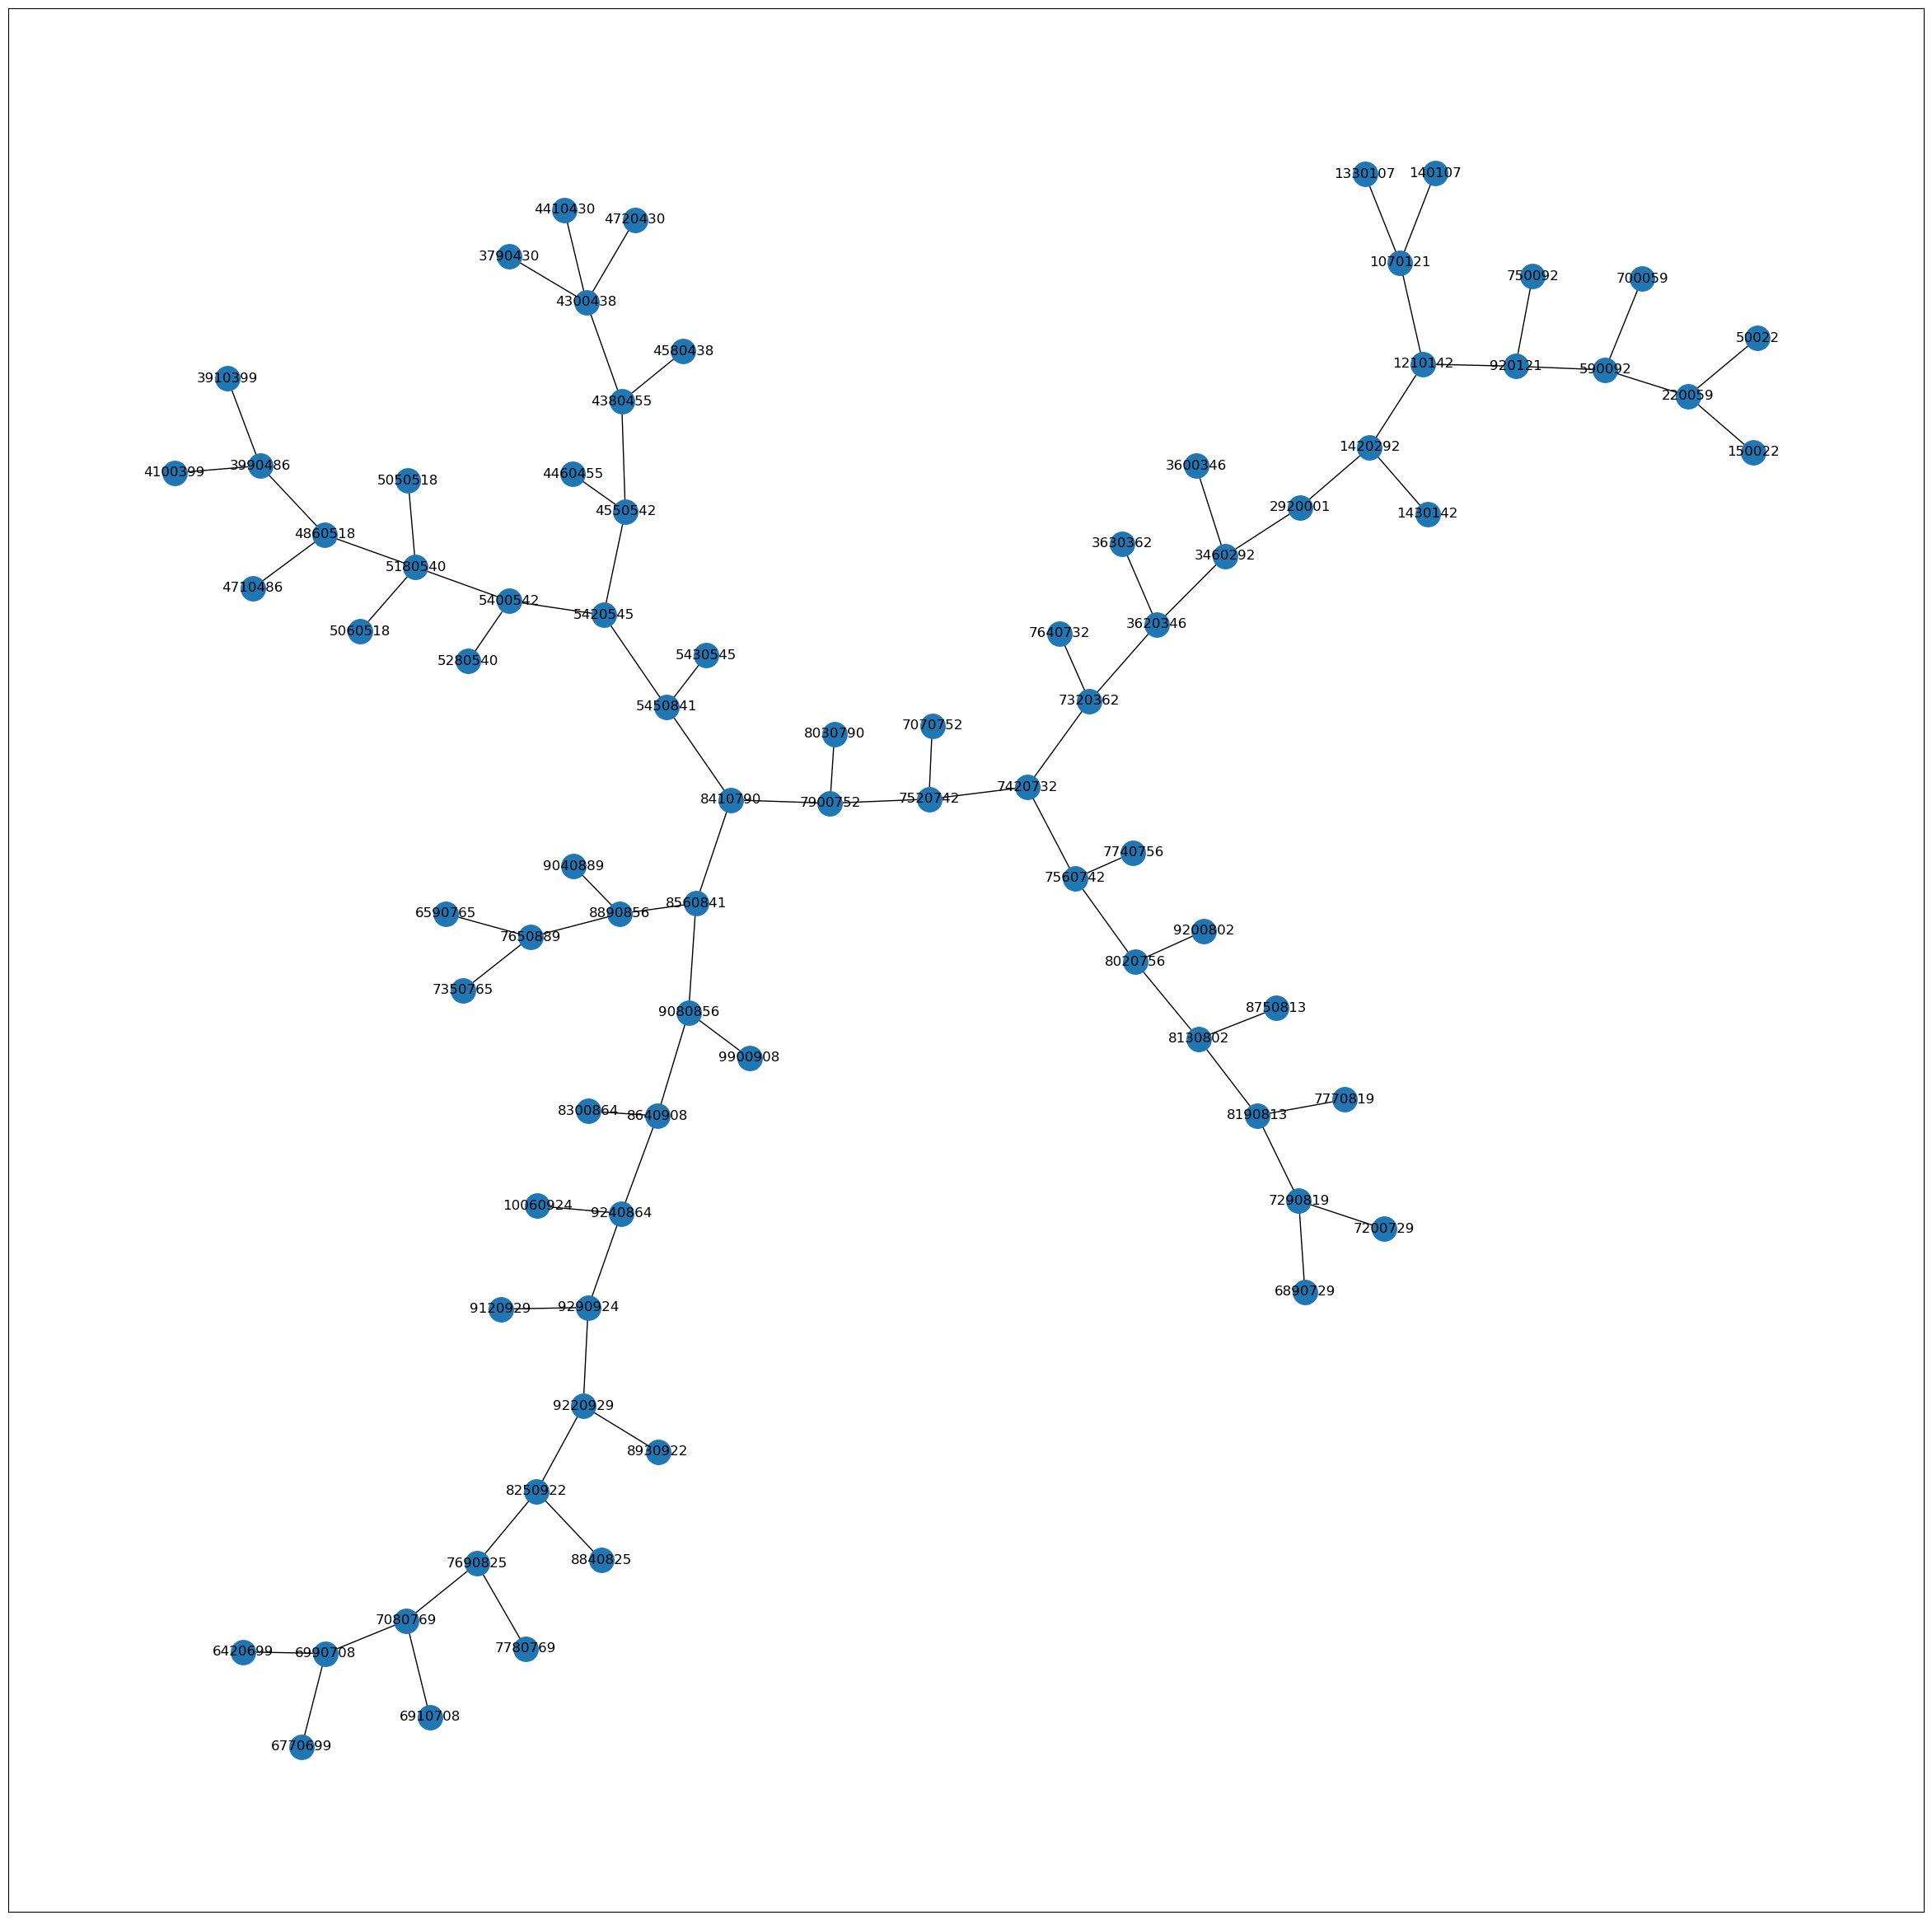

disconnected from arkouda server tcp://*:5555


In [5]:
draw_graph(graph, 30, 30)
draw_graph(branch_node_graph, 30, 30)

In [11]:
ak.connect()

subgraph = ar.PropGraph()
src_sub= [2, 3, 4]
dst_sub= [1, 1, 1] 
subgraph.add_edges_from(ak.array(src_sub), ak.array(dst_sub))

find_isomorphic_subgraphs(graph, subgraph)

connected to arkouda server tcp://*:5555


Isomorphisms found: [518 505 486 506 518 505 506 486 518 486 505 506 518 486 506 505 518 506 486 505 518 506 505 486 430 379 441 472 430 379 472 441 430 441 379 472 430 441 472 379 430 472 441 379 430 472 379 441]
Number of Mappings found: 12


[{1: 518, 2: 505, 3: 486, 4: 506},
 {1: 518, 2: 505, 3: 506, 4: 486},
 {1: 518, 2: 486, 3: 505, 4: 506},
 {1: 518, 2: 486, 3: 506, 4: 505},
 {1: 518, 2: 506, 3: 486, 4: 505},
 {1: 518, 2: 506, 3: 505, 4: 486},
 {1: 430, 2: 379, 3: 441, 4: 472},
 {1: 430, 2: 379, 3: 472, 4: 441},
 {1: 430, 2: 441, 3: 379, 4: 472},
 {1: 430, 2: 441, 3: 472, 4: 379},
 {1: 430, 2: 472, 3: 441, 4: 379},
 {1: 430, 2: 472, 3: 379, 4: 441}]

In [1]:
# k = get_neuron(720575940591794860, 1, 1000)

In [21]:
from fafbseg import flywire
flywire.is_latest_root([720575940627895056, 720575940591794860], timestamp='mat_783')
# morphology = flywire.get_skeletons(720575940591794860, dataset=783)

array([ True,  True])

In [6]:
n= navis.read_swc('test_folder/sk_lod1_783_healed/720575940596125868.swc')  
flywire.get_synapses(n, attach=True, materialization=783)

,pre,post,cleft_score,pre_x,pre_y,pre_z,post_x,post_y,post_z,id
0,720575940625529381,720575940596125868,72,706648,258924,205320,706652,258812,205320,32204827
1,720575940625529381,720575940596125868,148,707192,258244,207520,707072,258236,207480,131953950
2,720575940625529381,720575940596125868,141,706864,258048,204760,706944,258104,204760,149561704
3,720575940630598927,720575940596125868,56,702272,263848,205680,702412,263824,205720,30792813
4,720575940630598927,720575940596125868,52,701444,263680,205640,701372,263544,205600,32020207
...,...,...,...,...,...,...,...,...,...,...
420,720575940596125868,720575940633572004,144,707064,275744,222800,707080,275844,222760,199705791
421,720575940596125868,720575940645723428,141,709728,274156,222600,709660,274060,222560,200288019
422,720575940596125868,720575940621116807,140,703252,264424,204040,703100,264332,204000,148237971
423,720575940596125868,720575940632195532,141,705916,275748,221840,705884,275676,221800,200285503


In [10]:
import navis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

branch_points = n.branch_points
connectors = n.connectors
leafs = n.leafs
n_nodes = n.nodes
# n_ds_nodes = n_test.nodes
# n_ds_edges = n_test.edge_coords

x = branch_points.loc[:, "x"]
y = branch_points.loc[:, "y"]
z = branch_points.loc[:, "z"]

bp_coordinates = np.vstack((x, y, z)).T

x = connectors.loc[:, "x"]
y = connectors.loc[:, "y"]
z = connectors.loc[:, "z"]

c_coordinates = np.vstack((x, y, z)).T

x = leafs.loc[:, "x"]
y = leafs.loc[:, "y"]
z = leafs.loc[:, "z"]

l_coordinates = np.vstack((x, y, z)).T

x = n_nodes.loc[:, "x"]
y = n_nodes.loc[:, "y"]
z = n_nodes.loc[:, "z"]

n_nodes_coordinates = np.vstack((x, y, z)).T

# x = n_ds_nodes.loc[:, "x"]
# y = n_ds_nodes.loc[:, "y"]
# z = n_ds_nodes.loc[:, "z"]

# n_ds_nodes_coordinates = np.vstack((x, y, z)).T

x=[]
y=[]
z=[]
xx=[]
yy=[]
zz=[]
# for edges_pair in n_ds_edges:
#     xx.append((edges_pair[0][0] + edges_pair[1][0])/2)
#     yy.append((edges_pair[0][1] + edges_pair[1][1])/2)
#     zz.append((edges_pair[0][2] + edges_pair[1][2])/2)
#     for coordinates in edges_pair:
#         x.append(coordinates[0])
#         y.append(coordinates[1])
#         z.append(coordinates[2])

n_ds_edges_coordinates= np.vstack((x, y, z)).T
edge_point_coordinates= np.vstack((xx, yy, zz)).T



In [13]:
fig = navis.plot3d([n, connectors], color=['red', 'blue'])

In [12]:
# ak.connect()
# first_graph = ar.PropGraph()
# src=[1]
# node_dict = {
#     "node_id":src,
#     "neuron_id":src,
#     "src_node":src,
#     "src_x":src,
#     "src_y":src,
#     "src_z":src,
#     "dst_node":src,
#     "dst_x":src,
#     "dst_y":src,
#     "dst_z":src,
# }
# node_df = ak.DataFrame(node_dict)
# first_graph.load_node_attributes(node_df, node_column="node_id", label_columns=["neuron_id"])


In [19]:
%env ANYWIDGET_HMR=2

env: ANYWIDGET_HMR=2


In [20]:
import anywidget
import traitlets


class CounterWidget(anywidget.AnyWidget):
    _esm = "test.js"
    _css = "test.css"
    value = traitlets.Int(0).tag(sync=True)

counter = CounterWidget()
counter

CounterWidget()

In [4]:
counter.value = 10